<a href="https://colab.research.google.com/github/shubhro-jyoti/Yes-bank-stock-closing-price-prediction./blob/main/Yes_bank_stock_closing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem statement:** The problem statement is to predict the stock closing price of yes bank.

In [15]:
# importing the neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/ML project/data_YesBank_StockPrices.csv')

### **Data Inspection**

In [ ]:
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [ ]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
df.tail()

,Date,Open,High,Low,Close
180,2020-07-01,25.60,28.30,11.10,11.95
181,2020-08-01,12.00,17.16,11.85,14.37
182,2020-09-01,14.30,15.34,12.75,13.15
183,2020-10-01,13.30,14.01,12.11,12.42
184,2020-11-01,12.41,14.90,12.21,14.67


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


we can see that there are no nullvalues and the datatypes are correct as per the columns.

In [ ]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [5]:
def changedate(date):
  
  date_dict={'Jan':'January','Feb':'Feburary','Mar':'March','Apr':'April','May':'May','Jun':'June','Jul':'July','Aug':'August','Sep':'September','Oct':'October','Nov':'November','Dec':'December'}
  x=date[:-3]
  y=date_dict.get(x)
  return y

In [6]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### **Dataset information**

There are four given columns:
1. Date: contains the monthly date from July 2005 till November 2020 (Categorical)
2. Open: It is the opening price of the given stock (Numeric)
3. Close: It is the closing price of the given stock (Numeric)
4. High: It is the highest price of the stock monthly (Numeric)
5. Low: It is the lowest price of the stock monthly (Numeric)
6. Close: It is the closing price of the given stock (Numeric)

Here, the dependent variable is Closing price.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


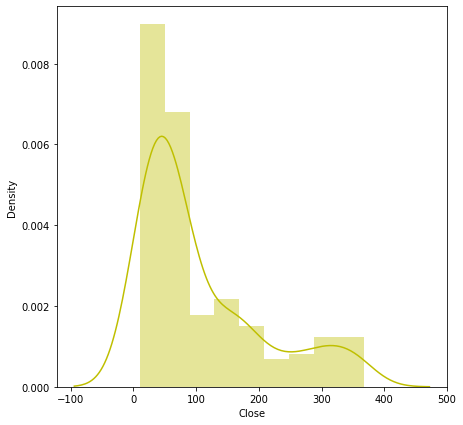

In [7]:
# let us now check the distribution of dependent variable
plt.figure(figsize=(7,7))
sns.distplot(df['Close'],color="y")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


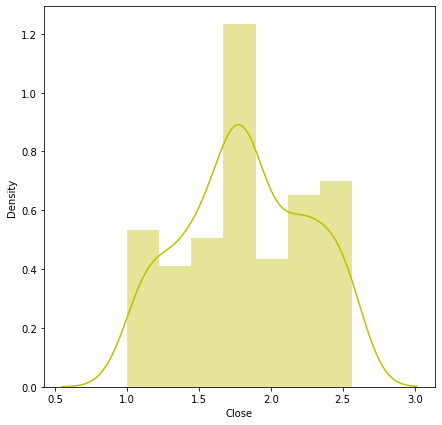

In [8]:
# applying log to dependent variable
plt.figure(figsize=(7,7))
sns.distplot(np.log10(df['Close']),color="y")

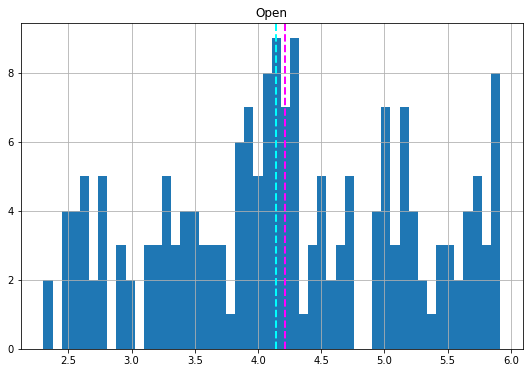

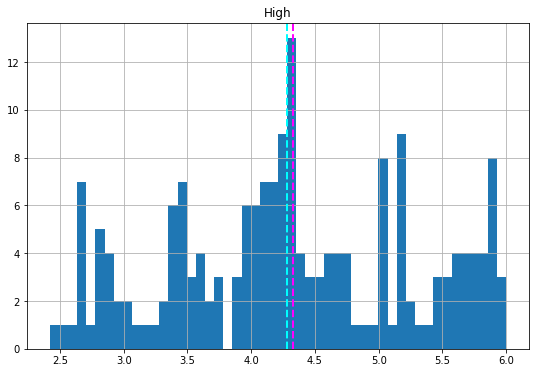

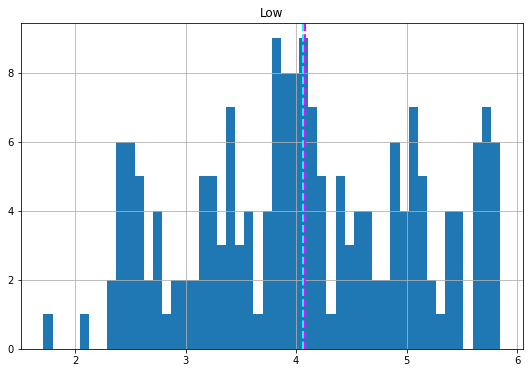

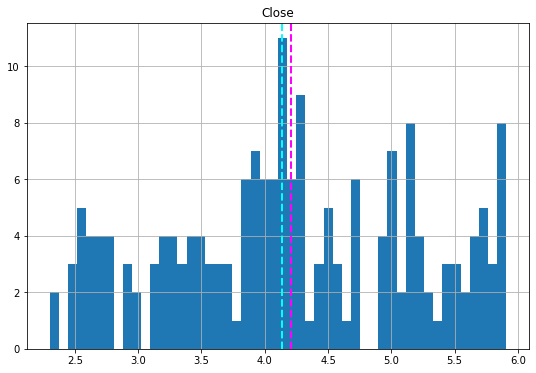

In [9]:
# plotting bar graph for all numeric features
numeric_features = df.columns

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.log(df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [10]:
# creating dataframe for monthly close price
date_close=pd.DataFrame(list(zip(df['Date'],df['Close']))).rename(columns = {0:'Date', 1:'Close price'})
date_close

,Date,Close price
0,Jul-05,12.46
1,Aug-05,13.42
2,Sep-05,13.30
3,Oct-05,12.99
4,Nov-05,13.41
...,...,...
180,Jul-20,11.95
181,Aug-20,14.37
182,Sep-20,13.15
183,Oct-20,12.42


Text(0.5, 1.0, 'Close price history')

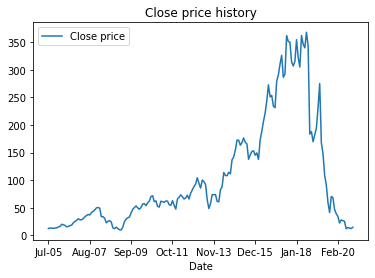

In [11]:
# visualising the closing price history
date_close.plot(x = 'Date', y = 'Close price')
plt.title('Close price history')

In [16]:
#defining ATR period
atr_period = 14

#calculating the range of each candle
df['range'] = df['High'] - df['Low']

#calculating the average value of the ranges 
df['atr_14'] = df['range'].rolling(atr_period).mean()

#plotting the ATR indicator
fig_atr = px.line(df,y='atr_14',title= 'ATR Indicator')
display(fig_atr)

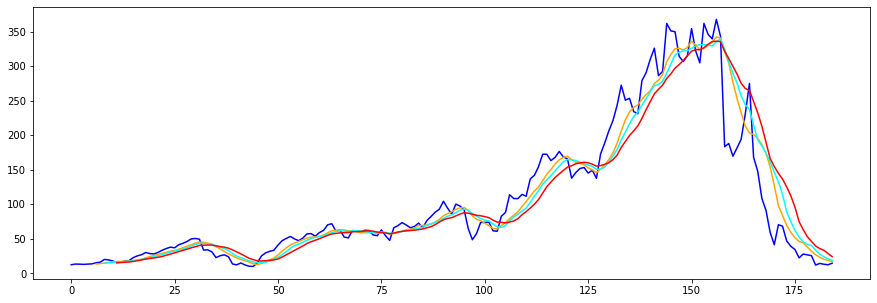

,Date,Open,High,Low,Close,range,atr_14,sma_7,sma_9,sma_12
0,Jul-05,13.00,14.00,11.25,12.46,2.75,NaN,NaN,NaN,NaN
1,Aug-05,12.58,14.88,12.55,13.42,2.33,NaN,NaN,NaN,NaN
2,Sep-05,13.48,14.87,12.27,13.30,2.60,NaN,NaN,NaN,NaN
3,Oct-05,13.20,14.47,12.40,12.99,2.07,NaN,NaN,NaN,NaN
4,Nov-05,13.35,13.88,12.88,13.41,1.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95,17.20,27.796429,26.935714,33.755556,39.600000
181,Aug-20,12.00,17.16,11.85,14.37,5.31,24.243571,23.388571,27.763333,35.839167
182,Sep-20,14.30,15.34,12.75,13.15,2.59,22.367857,20.331429,24.007778,33.480833
183,Oct-20,13.30,14.01,12.11,12.42,1.90,19.700000,18.898571,21.032222,28.645000


In [18]:
#making columns of different possible moving averages
df['sma_7'] = df['Close'].rolling(7).mean()
df['sma_9'] = df['Close'].rolling(9).mean()
df['sma_12'] = df['Close'].rolling(12).mean()

#Visualizing with different moving averages
plt.figure(figsize=(15,5))
plt.plot(df['Close'],color='blue')
plt.plot(df['sma_7'],color='orange')
plt.plot(df['sma_9'],color='cyan')
plt.plot(df['sma_12'],color='red')
plt.show()
display(df)